In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso,  ElasticNet
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder



sns.set_style('whitegrid')

In [2]:
class CONFIG:
    # input file
    input_file = 'data.csv'
    # column names
    column_names = ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration']
    
    # Numeric columns
    numeric_columns = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration']

    # Categorical columns


## Data Import

In [3]:
df = pd.read_csv('data.csv')

df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,0,id1240020,1,2016-02-23 07:00:39,2016-02-23 07:12:06,1,-73.985283,40.723553,-73.975433,40.755489,N,687
1,1,id1510937,1,2016-05-05 15:51:18,2016-05-05 16:29:14,1,-73.986282,40.742828,-73.871162,40.774216,N,2276
2,2,id3909687,2,2016-01-31 19:31:24,2016-01-31 19:54:28,2,-73.950233,40.779861,-73.996193,40.726009,N,1384
3,3,id3757092,1,2016-04-23 09:22:37,2016-04-23 09:25:11,1,-73.982208,40.740139,-73.977905,40.746174,N,154
4,4,id3662683,1,2016-03-01 20:36:25,2016-03-01 20:55:39,2,-73.983170,40.777641,-73.938675,40.819790,N,1154


In [4]:
df = df.drop(["Unnamed: 0",'id', 'vendor_id'], axis=1)
df.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2016-02-23 07:00:39,2016-02-23 07:12:06,1,-73.985283,40.723553,-73.975433,40.755489,N,687
1,2016-05-05 15:51:18,2016-05-05 16:29:14,1,-73.986282,40.742828,-73.871162,40.774216,N,2276
2,2016-01-31 19:31:24,2016-01-31 19:54:28,2,-73.950233,40.779861,-73.996193,40.726009,N,1384
3,2016-04-23 09:22:37,2016-04-23 09:25:11,1,-73.982208,40.740139,-73.977905,40.746174,N,154
4,2016-03-01 20:36:25,2016-03-01 20:55:39,2,-73.983170,40.777641,-73.938675,40.819790,N,1154


In [5]:
columns = df.columns

## Data Description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875186 entries, 0 to 875185
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pickup_datetime     875186 non-null  object 
 1   dropoff_datetime    875186 non-null  object 
 2   passenger_count     875186 non-null  int64  
 3   pickup_longitude    875186 non-null  float64
 4   pickup_latitude     875186 non-null  float64
 5   dropoff_longitude   875186 non-null  float64
 6   dropoff_latitude    875186 non-null  float64
 7   store_and_fwd_flag  875186 non-null  object 
 8   trip_duration       875186 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 60.1+ MB


`Note` : store_and_fwd_flag is binary category (Yes/No) we will need to transform it to numeric values ({'Yes':1, 'No':0})

## Data Tranformation

In [7]:
df["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    870373
Y      4813
Name: count, dtype: int64

In [8]:
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].map({'N': 0, 'Y': 1})

In [9]:
df.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2016-02-23 07:00:39,2016-02-23 07:12:06,1,-73.985283,40.723553,-73.975433,40.755489,0,687
1,2016-05-05 15:51:18,2016-05-05 16:29:14,1,-73.986282,40.742828,-73.871162,40.774216,0,2276
2,2016-01-31 19:31:24,2016-01-31 19:54:28,2,-73.950233,40.779861,-73.996193,40.726009,0,1384
3,2016-04-23 09:22:37,2016-04-23 09:25:11,1,-73.982208,40.740139,-73.977905,40.746174,0,154
4,2016-03-01 20:36:25,2016-03-01 20:55:39,2,-73.983170,40.777641,-73.938675,40.819790,0,1154


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,875186.0,1.663098,1.312686,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,875186.0,-73.973478,0.066453,-121.933235,-73.991882,-73.981750,-73.967331,-6.584839e+01
pickup_latitude,875186.0,40.750914,0.033512,34.359695,40.737331,40.754093,40.768326,5.188108e+01
dropoff_longitude,875186.0,-73.973405,0.065735,-121.933205,-73.991325,-73.979759,-73.963028,-6.584839e+01
dropoff_latitude,875186.0,40.751790,0.036147,32.181141,40.735844,40.754520,40.769791,4.392103e+01
store_and_fwd_flag,875186.0,0.005499,0.073954,0.000000,0.000000,0.000000,0.000000,1.000000e+00
trip_duration,875186.0,966.670773,6262.690745,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [11]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])
df.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2016-02-23 07:00:39,2016-02-23 07:12:06,1,-73.985283,40.723553,-73.975433,40.755489,0,687
1,2016-05-05 15:51:18,2016-05-05 16:29:14,1,-73.986282,40.742828,-73.871162,40.774216,0,2276
2,2016-01-31 19:31:24,2016-01-31 19:54:28,2,-73.950233,40.779861,-73.996193,40.726009,0,1384
3,2016-04-23 09:22:37,2016-04-23 09:25:11,1,-73.982208,40.740139,-73.977905,40.746174,0,154
4,2016-03-01 20:36:25,2016-03-01 20:55:39,2,-73.983170,40.777641,-73.938675,40.819790,0,1154


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875186 entries, 0 to 875185
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pickup_datetime     875186 non-null  datetime64[ns]
 1   dropoff_datetime    875186 non-null  datetime64[ns]
 2   passenger_count     875186 non-null  int64         
 3   pickup_longitude    875186 non-null  float64       
 4   pickup_latitude     875186 non-null  float64       
 5   dropoff_longitude   875186 non-null  float64       
 6   dropoff_latitude    875186 non-null  float64       
 7   store_and_fwd_flag  875186 non-null  int64         
 8   trip_duration       875186 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 60.1 MB


In [14]:
df.describe(include='datetime')

,pickup_datetime,dropoff_datetime
count,875186,875186
mean,2016-04-01 11:12:51.719155712,2016-04-01 11:28:58.389928448
min,2016-01-01 00:00:17,2016-01-01 00:03:31
25%,2016-02-17 17:47:11.500000,2016-02-17 18:02:25
50%,2016-04-01 18:18:38.500000,2016-04-01 18:31:15
75%,2016-05-15 06:58:20.249999872,2016-05-15 07:16:24.750000128
max,2016-06-30 23:59:39,2016-07-01 22:10:26


## EDA

<Axes: xlabel='trip_duration'>

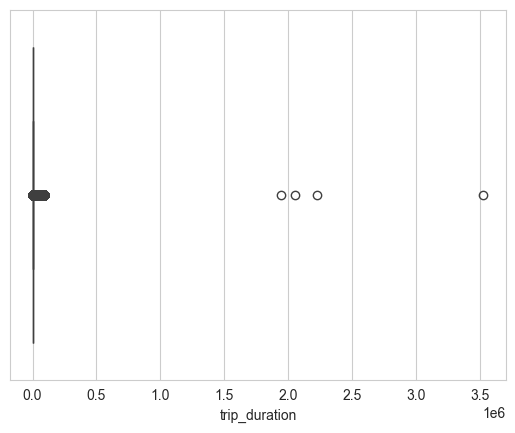

In [44]:
sns.boxplot(x=df["trip_duration"])

In [15]:
#Convert into radians
df_data = df.copy()
df_data['pickup_latitude'] = np.radians(df_data['pickup_latitude'])
df_data['pickup_longitude']=np.radians(df_data['pickup_longitude'])
df_data['dropoff_latitude']=np.radians(df_data['dropoff_latitude'])
df_data['dropoff_longitude']=np.radians(df_data['dropoff_longitude'])

#Calculate the difference
df_data['latitude_diff']=df_data['dropoff_latitude']-df_data['pickup_latitude']
df_data['longitude_diff']=df_data['dropoff_longitude']-df_data['pickup_longitude']

#calculate the distance in meter
df_data['trip_distance']=1000 * 6371 * 2 * np.arcsin(
    np.sqrt(
        np.sin(df_data['latitude_diff']/2)**2
        + np.cos(df_data['pickup_latitude'])
        * np.cos(df_data['dropoff_latitude'])
        * np.sin(df_data['longitude_diff']/2)**2
    )
)
df_data.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latitude_diff,longitude_diff,trip_distance
0,2016-02-23 07:00:39,2016-02-23 07:12:06,1,-1.291287,0.710760,-1.291115,0.711317,0,687,0.000557,0.000172,3646.860388
1,2016-05-05 15:51:18,2016-05-05 16:29:14,1,-1.291304,0.711097,-1.289295,0.711644,0,2276,0.000548,0.002009,10305.161764
2,2016-01-31 19:31:24,2016-01-31 19:54:28,2,-1.290675,0.711743,-1.291477,0.710803,0,1384,-0.000940,-0.000802,7130.519615
3,2016-04-23 09:22:37,2016-04-23 09:25:11,1,-1.291233,0.711050,-1.291158,0.711155,0,154,0.000105,0.000075,762.701706
4,2016-03-01 20:36:25,2016-03-01 20:55:39,2,-1.291250,0.711704,-1.290473,0.712440,0,1154,0.000736,0.000777,5999.416009


In [17]:
#Calculate speed in m/s
df_data['avg_trip_speed']=df_data['trip_distance']/df_data['trip_duration']

In [18]:
df_data["pickup_month"] = df_data["pickup_datetime"].dt.month
df_data["pickup_day_of_week"] = df_data["pickup_datetime"].dt.dayofweek
df_data["pickup_day"] = df_data["pickup_datetime"].dt.day
df_data["pickup_hour"] = df_data["pickup_datetime"].dt.hour

df_data["dropoff_month"] = df_data["dropoff_datetime"].dt.month
df_data["dropoff_day_of_week"] = df_data["dropoff_datetime"].dt.dayofweek
df_data["dropoff_day"] = df_data["dropoff_datetime"].dt.day
df_data["dropoff_hour"] = df_data["dropoff_datetime"].dt.hour


In [20]:
df_data["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
0    870373
1      4813
Name: count, dtype: int64

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875186 entries, 0 to 875185
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pickup_datetime      875186 non-null  datetime64[ns]
 1   dropoff_datetime     875186 non-null  datetime64[ns]
 2   passenger_count      875186 non-null  int64         
 3   pickup_longitude     875186 non-null  float64       
 4   pickup_latitude      875186 non-null  float64       
 5   dropoff_longitude    875186 non-null  float64       
 6   dropoff_latitude     875186 non-null  float64       
 7   store_and_fwd_flag   875186 non-null  int64         
 8   trip_duration        875186 non-null  int64         
 9   latitude_diff        875186 non-null  float64       
 10  longitude_diff       875186 non-null  float64       
 11  trip_distance        875186 non-null  float64       
 12  avg_trip_speed       875186 non-null  float64       
 13  pickup_month  

In [22]:
df_data.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'latitude_diff', 'longitude_diff', 'trip_distance', 'avg_trip_speed',
       'pickup_month', 'pickup_day_of_week', 'pickup_day', 'pickup_hour',
       'dropoff_month', 'dropoff_day_of_week', 'dropoff_day', 'dropoff_hour'],
      dtype='object')

In [24]:
drop_cols=['pickup_datetime', 'dropoff_datetime','pickup_longitude', 'pickup_latitude',
          'dropoff_longitude', 'dropoff_latitude','store_and_fwd_flag','latitude_diff','longitude_diff']

df_data.drop(drop_cols,axis=1,inplace=True)

In [25]:
df_data.columns

Index(['passenger_count', 'trip_duration', 'trip_distance', 'avg_trip_speed',
       'pickup_month', 'pickup_day_of_week', 'pickup_day', 'pickup_hour',
       'dropoff_month', 'dropoff_day_of_week', 'dropoff_day', 'dropoff_hour'],
      dtype='object')

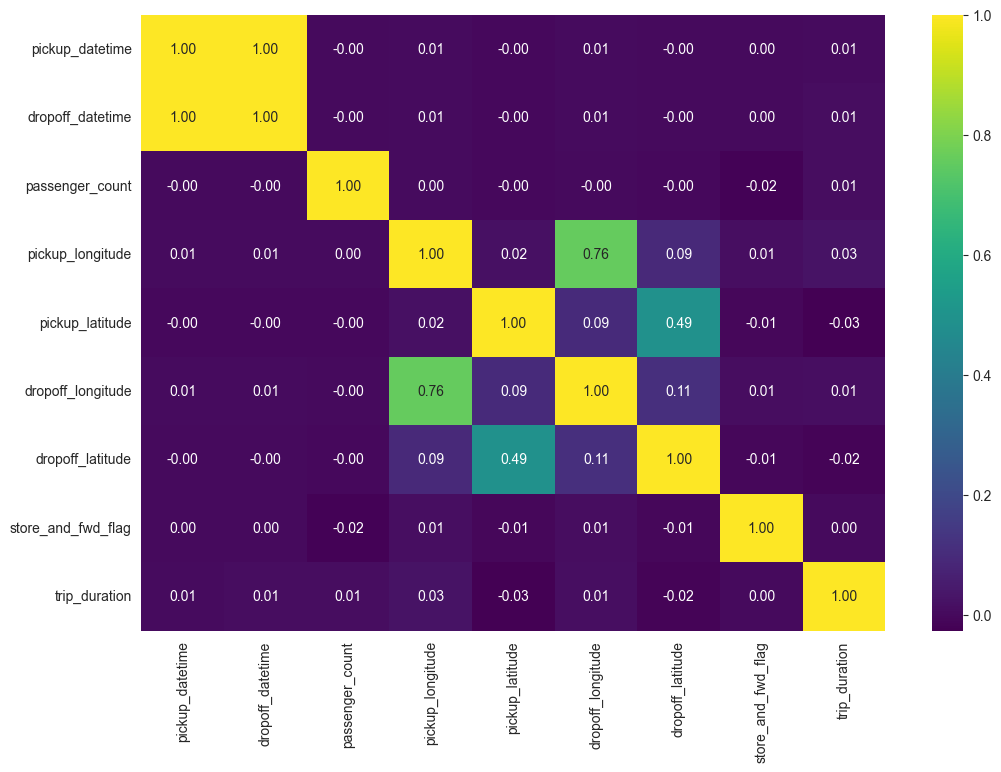

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()

In [26]:
#seperate dependent and independent features
X=df_data.drop(['trip_duration'],axis=1)
y=df_data['trip_duration']

In [27]:
# Break off dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (700148, 11) (700148,)
Test (175038, 11) (175038,)


In [28]:
#Scale the data
scaler=StandardScaler()

X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [ ]:
dtr_model=DecisionTreeRegressor(random_state=10)
dtr_model.fit(X_train_sc,y_train)

DecisionTreeRegressor(random_state=10)

In [39]:
pred=dtr_model.predict(X_test_sc)

In [40]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('R2', r2_score(y_test,pred))

MAE: 9.764974843557779
MSE: 258628.50115244815
RMSE: 508.555307859871
R2 0.9934856752172483


In [34]:
rf_model=RandomForestRegressor(random_state=10, n_estimators=100)
rf_model.fit(X_train_sc,y_train)

RandomForestRegressor(random_state=10)

In [41]:
pred_2=rf_model.predict(X_test_sc)

In [38]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('R2', r2_score(y_test,pred))

MAE: 11.417613515600326
MSE: 4776871.0107855825
RMSE: 2185.605410586637
R2 0.8796803559124123


## Model Final : DecisionTreeRegressor

`MAE`: 9.764974843557779

`MSE`: 258628.50115244815

`RMSE`: 508.555307859871

`R2` : 0.9934856752172483
